In [34]:
import pandas as pd  
import numpy as np
from sklearn.decomposition import NMF #non negative matric factorization

In [35]:
df=pd.read_csv(r"C:\Users\Sourabh\Desktop\Kulkarni\spotify.xls",index_col=[0])

In [36]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [37]:
df.shape

(1000, 5000)

In [5]:
#we will be building the recomdentation system using 2 diffrent methods
#1 Using Euclidean distance(can be done on less than 1 lakh users)
#2 Using clustering algorithm(for bigger data set)

# For both the above methods we will be using non negative matrix factorization


In [39]:
nmf = NMF(n_components=100,max_iter=1000,random_state=100)


In [40]:
x = df.values

In [41]:
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [42]:
nmf.fit(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


NMF(max_iter=1000, n_components=100, random_state=100)

In [43]:
user_matrix = nmf.transform(x)

In [44]:
user_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.84533542, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.63945089, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.33751685, 0.        , ..., 3.14601071, 0.        ,
        0.        ],
       [0.        , 1.12147873, 0.        , ..., 0.        , 0.40783907,
        1.47084396],
       [0.72454542, 1.81791399, 0.13795083, ..., 0.52178048, 0.        ,
        0.        ]])

In [45]:
user_matrix.shape

(1000, 100)

In [46]:
song_matrix = nmf.components_.T

In [47]:
song_matrix.shape

(5000, 100)

In [48]:
song_matrix

array([[0.13281758, 0.1474877 , 0.        , ..., 0.22845059, 0.19561522,
        0.23372763],
       [0.22575796, 0.        , 0.48204324, ..., 0.16088125, 0.06590065,
        0.08401945],
       [0.2610321 , 0.        , 0.02409176, ..., 0.65954439, 0.23477369,
        0.16624549],
       ...,
       [0.26699177, 0.23706928, 0.14580404, ..., 0.10532991, 0.4363255 ,
        0.31363757],
       [0.        , 0.24150991, 0.17487193, ..., 0.34798278, 0.06774254,
        0.        ],
       [0.13206822, 0.        , 0.01791898, ..., 0.27922375, 0.16782685,
        0.30997385]])

# Recommendation Engine building method 1 (User approach)

# Steps of building recommendation system 
1. Considering recammending songs to user no 1 who is located at row location 0.
1. Find the Euclidean distance between user1 and the remaning 1000 users
3. Find out the top 10 songs heard by 5 closest users to user no 1.
4. Recommend those 10 songs heard by closest users to user no 1.

In [16]:
##Finding the Euclidean distance between user no 1 and remaining users

In [49]:
def cal_dist(u1,u2):
    return pow(sum([pow(u1[x]-u2[x],2)for x in range(len(u1))]),0.5)

In [50]:
cal_dist(user_matrix[0],user_matrix[1])

12.962015431852794

## Finding out the distance between all the users form user1

In [51]:
def dist_from_base_user(base_user,user_matrix):
    dist = []
    for i in range(len(user_matrix)):
        if base_user != i :
            dist.append(cal_dist(user_matrix[base_user],user_matrix[i]))
    return dist

In [52]:
dist_from_user1 = dist_from_base_user(5,user_matrix)

# Finding out the 5 closest users

In [53]:
user_index = np.argsort(dist_from_user1)[0:5]

In [54]:
user_index

array([535, 896, 939, 209, 568], dtype=int64)

# Finding out the top 10 songs

In [55]:
for i in user_index:
    print('song heard by user',i+1)
    print("**************************************************")
    temp = pd.DataFrame(df.iloc[i])
    print (temp)

song heard by user 536
**************************************************
           user_536
song_1           14
song_2            5
song_3            0
song_4            5
song_5            9
...             ...
song_4996         9
song_4997         6
song_4998         0
song_4999        12
song_5000        11

[5000 rows x 1 columns]
song heard by user 897
**************************************************
           user_897
song_1            5
song_2           10
song_3           11
song_4            0
song_5           13
...             ...
song_4996        11
song_4997        13
song_4998        13
song_4999        10
song_5000         7

[5000 rows x 1 columns]
song heard by user 940
**************************************************
           user_940
song_1           13
song_2            4
song_3           12
song_4           10
song_5           10
...             ...
song_4996         7
song_4997         0
song_4998        13
song_4999         8
song_5000         9

[5000 r

## Picking up the songs heard by the closest users

In [56]:
def recommending_songs(user_index,df):
    temp = df.iloc[user_index]
    dict_temp = temp.max().to_dict()
    sorted_dict = sorted(dict_temp.items(), key = lambda keyvalue:(keyvalue[1],keyvalue[0]),reverse=True)[0:5]
    return [x[0] for x in sorted_dict]

In [57]:
recommending_songs(user_index,df)

['song_999', 'song_995', 'song_993', 'song_989', 'song_988']

## Recommendation Engine Building Method 2 (The song approach)
Steps for building recomendation system
1. We will be clusturing all the songs
2. We will be picking up a song heard by prticular user
3. We will be finding the cluster in which that particular song is present.
4. We will recommend other songs from that cluster to the user.

using K-means clusturing algorithm to build clusters.

In [58]:
from sklearn.cluster import KMeans

In [59]:
wcss = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters=k).fit(song_matrix)
    wcss[k] = kmeans.inertia_
    

In [60]:
wcss

{1: 14169.227673064306,
 2: 13990.184988961075,
 3: 13856.12305841963,
 4: 13746.39282531228,
 5: 13658.50171264444,
 6: 13593.36572454008,
 7: 13530.921393473382,
 8: 13481.49687891534,
 9: 13435.374748901282,
 10: 13390.307920941515,
 11: 13356.259265923954,
 12: 13320.973416383102,
 13: 13281.625204418695,
 14: 13262.117406593326,
 15: 13229.857329586159,
 16: 13208.45156559548,
 17: 13192.079817224905,
 18: 13171.195465057628,
 19: 13150.617144838474,
 20: 13126.031585924107,
 21: 13115.227396152297,
 22: 13081.57642905416,
 23: 13073.55210194189,
 24: 13052.13842878817,
 25: 13043.454072076707,
 26: 13021.410409100354,
 27: 13007.61531843045,
 28: 12996.331538789007,
 29: 12983.826067560076,
 30: 12956.011602357683,
 31: 12947.229508522814,
 32: 12940.635536326727,
 33: 12925.007630584001,
 34: 12903.234238302113,
 35: 12898.179272698984,
 36: 12885.62952880978,
 37: 12868.785479723985,
 38: 12865.354478043046,
 39: 12850.812913998021,
 40: 12832.12320451296,
 41: 12822.0799849774

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'wcss')

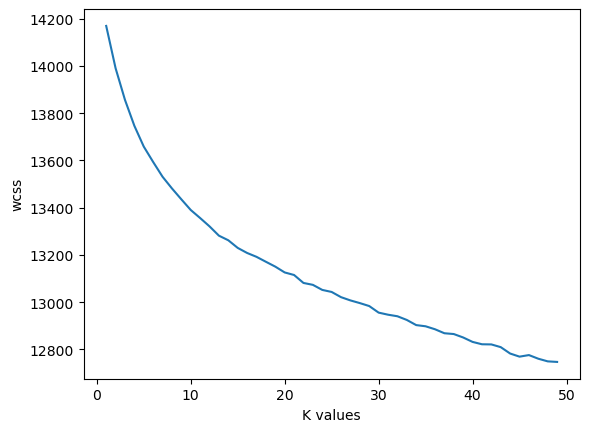

In [62]:
plt.plot(wcss.keys(),wcss.values())
plt.xlabel('K values')
plt.ylabel('wcss')

In [31]:
#we will be taking k value as 12

In [63]:
def recommend_songs(df,ncluster,song_matrix,song_name,n_recommend):
    
    # making clusters of song matrix
    kmeans = KMeans(n_clusters=ncluster).fit(song_matrix)
    
    # Finding the index of song in the dataframe
    index_in_song = df.columns.to_list().index(song_name)
    
    # Findig the vectorof the song from song matrix 
    song_vector = song_matrix[index_in_song]
    
    # Buiding 12 clusters using the Kmeans algorithm
    all_songs_in_clusters = list(kmeans.predict(song_matrix))
    
    # In the previous step the kmeans create 12 clusters of all the songs we have , now we are going to pick up in which cluster our desired song is placed in
    # and find other songs in that cluster.
    songs_in_select_cluster = [x for x in range(len(all_songs_in_clusters)) if 
                               all_songs_in_clusters[x]==kmeans.predict([song_vector])]
    
    
    #Finding the song names using the above recommeded indexes
    song_cluster = song_matrix[songs_in_select_cluster]
   

    # Finding out the nearest song using the nearest neighbour algorithm
    from sklearn.neighbors import NearestNeighbors
    
    nn = NearestNeighbors(n_neighbors=n_recommend)
    nn.fit(song_cluster)
    
    
    # Nearest neihbour songs
    recommeded_songs = nn.kneighbors([song_matrix[index_in_song]])
    
    
    # Printing the names of the songs
    col_list = list(df.columns)
    
    
    return [col_list[x] for x in recommeded_songs[1][0]]

In [64]:
recommend_songs(df,12,song_matrix,'song_10',5)

['song_2', 'song_344', 'song_374', 'song_110', 'song_42']

In [65]:
recommend_songs(df,12,song_matrix,'song_15',5)

['song_4', 'song_30', 'song_219', 'song_195', 'song_333']